In [1]:
#               ---------- KNN Classifier ----------------

## Importing the Necessary Libraries:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
## loading the dataset
data = pd.read_csv("bangalore house price prediction OHE-data.csv")
data

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move,...,location_Kalena Agrahara,location_Horamavu Agara,location_Vidyaranyapura,location_BTM 2nd Stage,location_Hebbal Kempapura,location_Hosur Road,location_Horamavu Banaswadi,location_Domlur,location_Mahadevpura,location_Tumkur Road
0,3.0,2.0,150.00,1672.0,3,8971.291866,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,3.0,3.0,149.00,1750.0,3,8514.285714,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3.0,2.0,150.00,1750.0,3,8571.428571,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2.0,2.0,40.00,1250.0,2,3200.000000,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2.0,2.0,83.00,1200.0,2,6916.666667,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7115,3.0,2.0,325.00,2900.0,3,11206.896552,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7116,3.0,1.0,84.83,1780.0,3,4765.730337,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7117,2.0,1.0,48.00,880.0,2,5454.545455,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
7118,2.0,1.0,55.00,1000.0,2,5500.000000,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
## performing the EDA 

In [3]:
data.shape

(7120, 108)

In [4]:
data.head(5)

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move,...,location_Kalena Agrahara,location_Horamavu Agara,location_Vidyaranyapura,location_BTM 2nd Stage,location_Hebbal Kempapura,location_Hosur Road,location_Horamavu Banaswadi,location_Domlur,location_Mahadevpura,location_Tumkur Road
0,3.0,2.0,150.0,1672.0,3,8971.291866,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,3.0,3.0,149.0,1750.0,3,8514.285714,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3.0,2.0,150.0,1750.0,3,8571.428571,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2.0,2.0,40.0,1250.0,2,3200.000000,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2.0,2.0,83.0,1200.0,2,6916.666667,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data.tail(5)

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move,...,location_Kalena Agrahara,location_Horamavu Agara,location_Vidyaranyapura,location_BTM 2nd Stage,location_Hebbal Kempapura,location_Hosur Road,location_Horamavu Banaswadi,location_Domlur,location_Mahadevpura,location_Tumkur Road
7115,3.0,2.0,325.00,2900.0,3,11206.896552,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7116,3.0,1.0,84.83,1780.0,3,4765.730337,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7117,2.0,1.0,48.00,880.0,2,5454.545455,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
7118,2.0,1.0,55.00,1000.0,2,5500.000000,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7119,2.0,1.0,78.00,1400.0,3,5571.428571,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
print(data.isnull().sum())

bath                           0
balcony                        0
price                          0
total_sqft_int                 0
bhk                            0
                              ..
location_Hosur Road            0
location_Horamavu Banaswadi    0
location_Domlur                0
location_Mahadevpura           0
location_Tumkur Road           0
Length: 108, dtype: int64


In [8]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7120 entries, 0 to 7119
Columns: 108 entries, bath to location_Tumkur Road
dtypes: float64(5), int64(103)
memory usage: 5.9 MB
None


In [4]:
df = data.copy()

In [ ]:
## data visualization

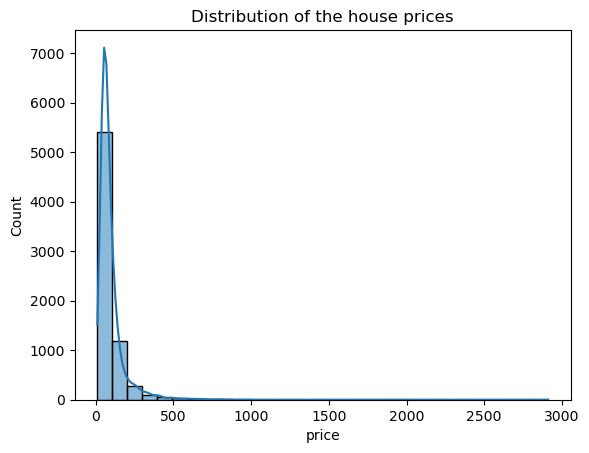

In [15]:
sns.histplot(df['price'],bins=30,kde=True)
plt.title("Distribution of the house prices")
plt.show()

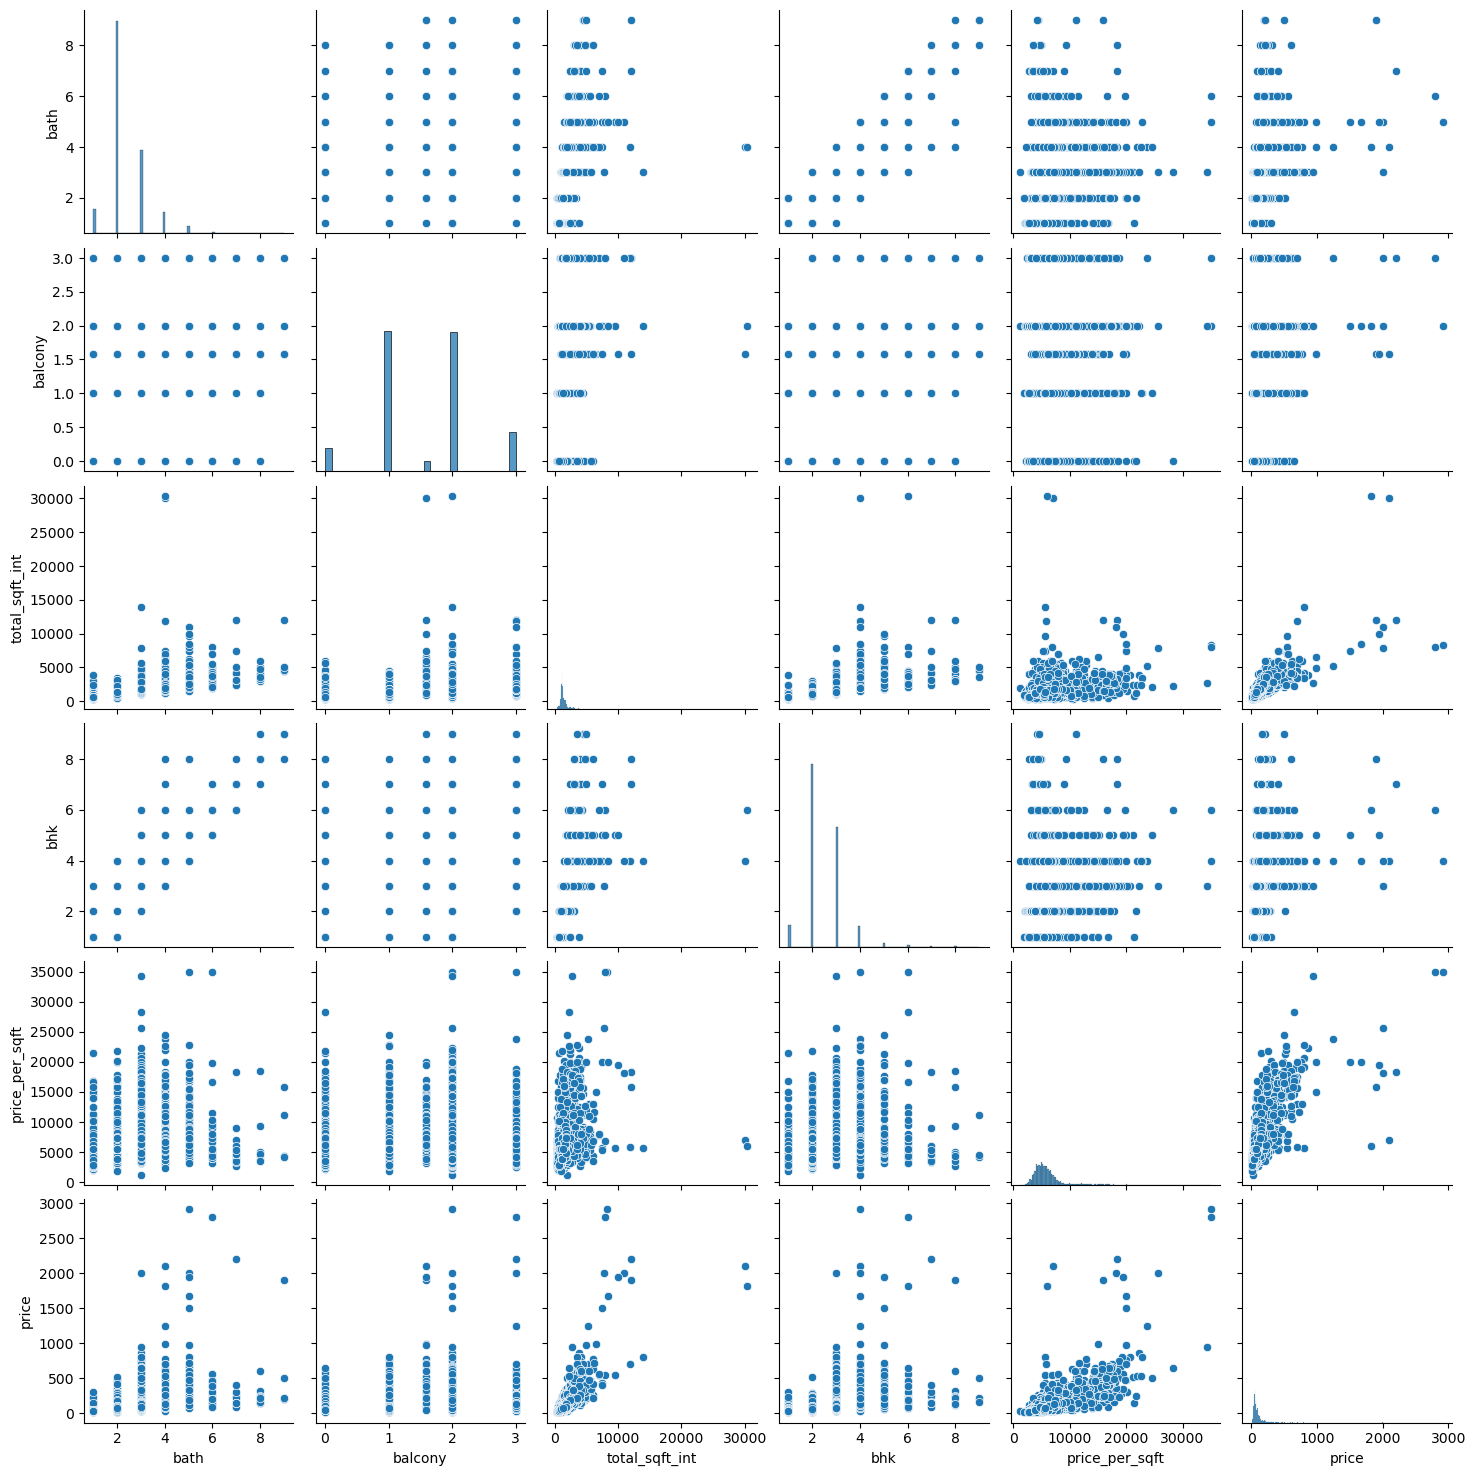

In [16]:
sns.pairplot(df[["bath","balcony","total_sqft_int","bhk","price_per_sqft","price"]])
plt.show()

In [ ]:
## data distribution in X and y

In [5]:
X = df[['bath','balcony','total_sqft_int','bhk','price_per_sqft']]
X

,bath,balcony,total_sqft_int,bhk,price_per_sqft
0,3.0,2.0,1672.0,3,8971.291866
1,3.0,3.0,1750.0,3,8514.285714
2,3.0,2.0,1750.0,3,8571.428571
3,2.0,2.0,1250.0,2,3200.000000
4,2.0,2.0,1200.0,2,6916.666667
...,...,...,...,...,...
7115,3.0,2.0,2900.0,3,11206.896552
7116,3.0,1.0,1780.0,3,4765.730337
7117,2.0,1.0,880.0,2,5454.545455
7118,2.0,1.0,1000.0,2,5500.000000


In [6]:
y =df['price']
y

0       150.00
1       149.00
2       150.00
3        40.00
4        83.00
         ...  
7115    325.00
7116     84.83
7117     48.00
7118     55.00
7119     78.00
Name: price, Length: 7120, dtype: float64

In [ ]:
##spliting the dataset into train and test sets

In [7]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state =42)

In [8]:
## training the data using KNN
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors = 15)
knn_model = knn.fit(X_train,y_train)


In [9]:
## making predictions
pred= knn.predict(X_test)
pred

array([46.682     , 59.96066667, 65.        , ..., 56.42333333,
       27.35866667, 49.34      ])

In [10]:
##checking the accuracy
from sklearn.metrics import mean_squared_error,r2_score
mse = mean_squared_error(y_test,pred)
print("The mean_squared_error of the model is : ",mse)


The mean_squared_error of the model is :  805.9199987518726


In [12]:
r2 = r2_score(y_test,pred)
print("The r2 score of the model is :",r2)

The r2 score of the model is : 0.9290135316265372


In [13]:
import joblib

In [14]:
## saving the model by using joblib

filename = 'joblib_houseprice_prj6.sav'
joblib.dump(knn_model,filename)

['joblib_houseprice_prj6.sav']